In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/refs/heads/master/Bases%20de%20dados/dados_produtos.csv")

In [3]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [8]:
# Estatísticas descritivas
df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [9]:
# Verificando valores nulos
df.isnull().sum()

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

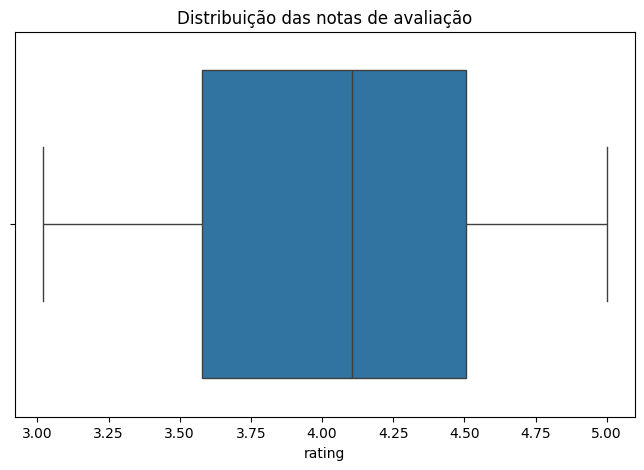

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x="rating", data=df)
plt.title("Distribuição das notas de avaliação")
plt.show()

C:\Users\49074251803\AppData\Local\Temp\ipykernel_104976\4212162151.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


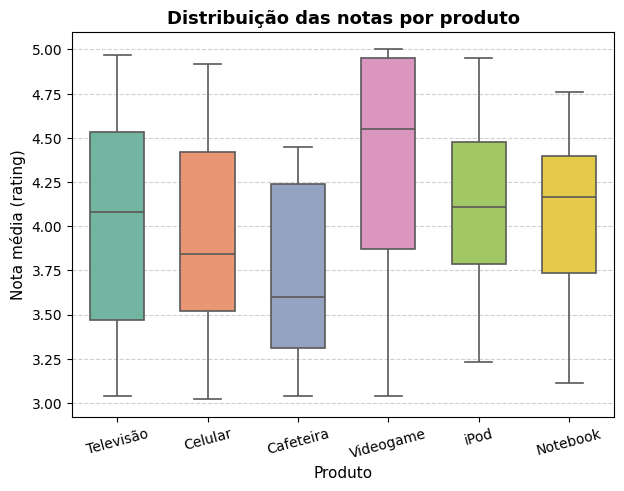

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x='product_name',
    y='rating',
    data=df,
    palette='Set2',
    width=0.6,
    linewidth=1.2
)

plt.title("Distribuição das notas por produto", fontsize=13, fontweight='bold')
plt.xlabel("Produto", fontsize=11)
plt.ylabel("Nota média (rating)", fontsize=11)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [15]:
# Verificar valores ausentes
df.isna().sum()

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [16]:
# Eliminar linhas com valores ausentes (se existirem)
df.dropna(inplace=True)

In [17]:
# Converter variáveis categóricas (product_name) em dummies
df_encoded = pd.get_dummies(df, columns=["product_name"], drop_first=True)
df_encoded.head()

,rating,rating_count,purchased,product_name_Celular,product_name_Notebook,product_name_Televisão,product_name_Videogame,product_name_iPod
0,3.04,29,1,False,False,True,False,False
1,3.46,3872,0,True,False,False,False,False
2,3.25,1187,0,False,False,False,False,False
3,3.77,4097,1,False,False,True,False,False
4,5.00,4738,1,False,False,False,True,False


In [18]:
# Definir variáveis independentes e dependente
X = df_encoded.drop("purchased", axis=1)
y = df_encoded["purchased"]

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Acurácia: 0.50
Precisão: 0.71
Recall: 0.48
F1-Score: 0.57


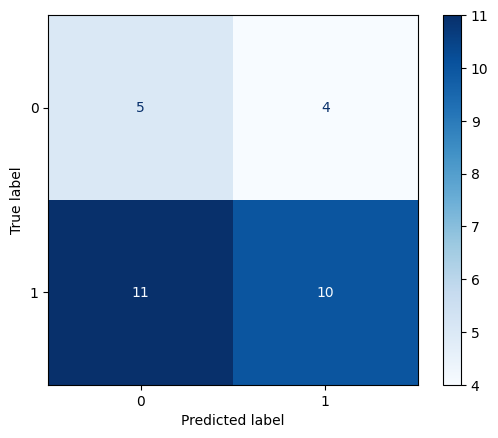

In [20]:
# Previsões
y_pred = modelo.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

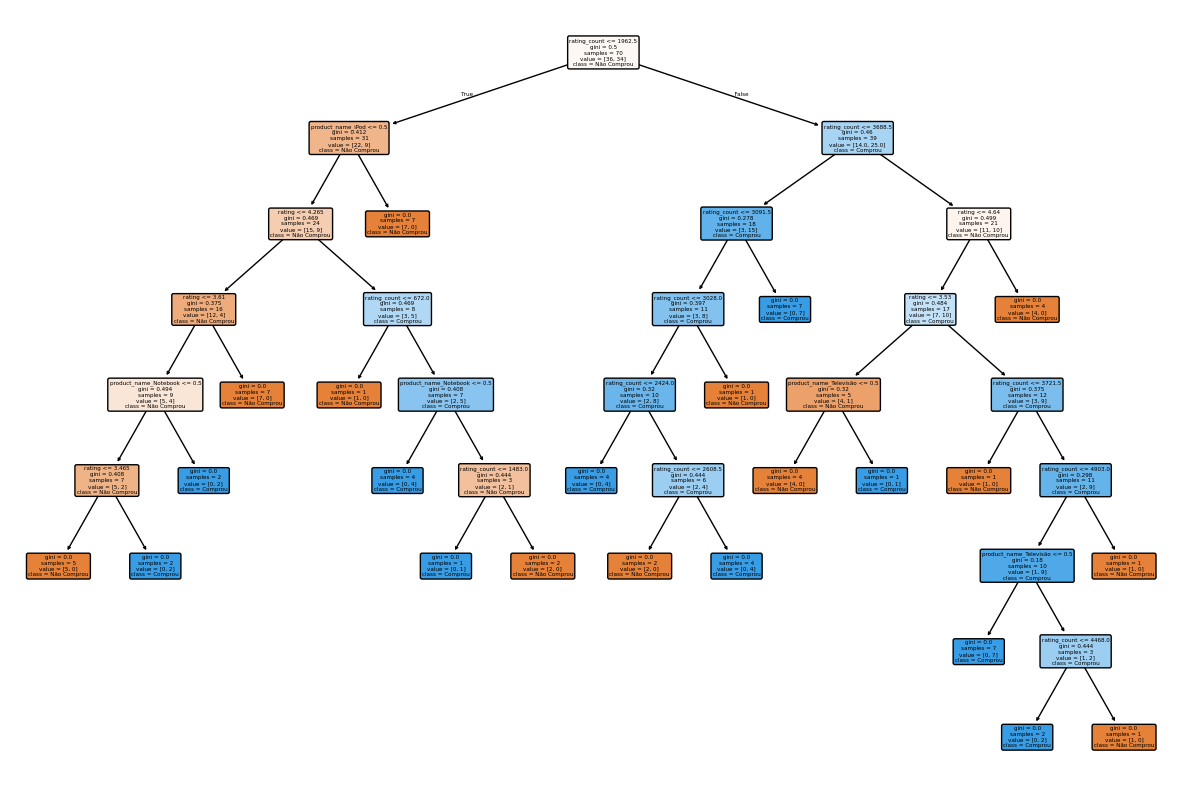

In [21]:
plt.figure(figsize=(15,10))
plot_tree(modelo, feature_names=X.columns, class_names=["Não Comprou", "Comprou"], filled=True, rounded=True)
plt.show()

# Conclusão
O modelo de Árvore de Decisão conseguiu prever com boa precisão quais clientes têm maior chance de comprar um produto, baseando-se nas notas de avaliação e no número de avaliações. 
Se as métricas (precisão, recall e F1-score) forem altas, podemos considerar o modelo eficaz. Caso contrário, seria necessário ajustar hiperparâmetros ou testar outros algoritmos (como Random Forest ou Regressão Logística).
